# Занятие 5. Статистические модели.

![модель](data/statmodel1.png)

## Несколько слов о домашнем задании.

1. Все еще не видел домашних заданий от всех :(
2. Графики должны быть монотонно возрастающими!
3. Если ваши "уникальные" индексы повторяются - вернитесь на шаг назад и проверьте скрипт сбора данных. Либо ваш индекс неуникален, либо при сборе данных вы берете одни записи несколько раз.
4. Следите за чистотой данных.
5. Контринтуитивно, но большинство операций в pandas и numpy применяются к массивами - столбцами, матрицам, и т. п. - а не единичным элементам.

## Тонем в данных, жаждем информации.

![данные](https://media.licdn.com/mpr/mpr/AAEAAQAAAAAAAAUJAAAAJDk1YWE3YWE5LTZhMmMtNGIxNC05NjM0LTg1ZmYxNGUzNGY2Yw.png)
В 2015 году мы создали 8 зетабайт информации.
Сколько из нее реально полезной и реально используется?
[(c)](http://ericbrown.com/drowning-in-data-starved-for-information.htm)

BIG data =/= много информации. Иногда это много шума, много бесполезных данных.

Статистическая модель - семейство распределений данных задаваемые параметрами.

Подчеркивают разницу между данными и параметрами.

Полезны и как источник дополнительной информации для следующих шагов и как инструмент предиктивной аналитики.

Параметрические (нормальное, биномиальное, ...) и непараметрические (bootstrap, KDE). Очень сбивающее с толку название - множество параметров вместо отсутствия.


[Р.Э.Фишер](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D1%88%D0%B5%D1%80,_%D0%A0%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%B4_%D0%AD%D0%B9%D0%BB%D0%BC%D0%B5%D1%80) ~1920г. - первое формальное описание статистического моделирования.

![](http://www.azquotes.com/picture-quotes/quote-all-models-are-wrong-but-some-are-useful-george-e-p-box-53-42-27.jpg)

![](https://i2.wp.com/coldnoon.com/wp-content/uploads/2015/11/Old_map-El_Paso-1886_On-the-Exactitude-in-Science_Small.jpg?fit=531%2C400)

[On Exactitude in Science](https://en.wikipedia.org/wiki/On_Exactitude_in_Science) (с) Борхес

Big data - не панацея. Численное решение не дает новых знаний.

## Релевантные книги

* [A.C.Davison "Statistical Models"](https://play.google.com/store/books/details?pcampaignid=books_read_action&id=9fsLBAAAQBAJ)

* [D.A.Freedman "Statistical Models: Theory and Practice"](https://play.google.com/store/books/details?pcampaignid=books_read_action&id=fW_9BV5Wpf8C)

Фриквентистское [понимание вероятности](http://www.wikiznanie.ru/wikipedia/index.php/%D0%98%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D1%80%D0%B5%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) и [его ограничения](http://schegl2g.bget.ru/bayes/YudkowskyBayes.html).
Необходимость моделей.

![](https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png)

In [2]:
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

[Распределение Бернулли](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%91%D0%B5%D1%80%D0%BD%D1%83%D0%BB%D0%BB%D0%B8)

In [3]:
brv=sp.stats.bernoulli(p=0.4)
# RVS - Random VariableS
runs = brv.rvs(size=10)
print runs
print float(sum(runs))/len(runs)

[1 0 0 0 0 0 1 0 0 0]
0.2


## Некоторые сокращения

RVS - Random VariableS - набор случайных переменных

PMF - [Probability Mass Function](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) - Функция вероятности, вероятность того, что переменная примет определенное ДИСКРЕТНОЕ значение.

PDF - [Probability Density Function](https://ru.wikipedia.org/wiki/%D0%9F%D0%BB%D0%BE%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%B2%D0%B5%D1%80%D0%BE%D1%8F%D1%82%D0%BD%D0%BE%D1%81%D1%82%D0%B8) - Аналог PMF для непрерывного распределения.

CDF - [Cumulative distribution function](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F) - функция распределения, вероятность того, что случайная величина примет значение X или меньше.

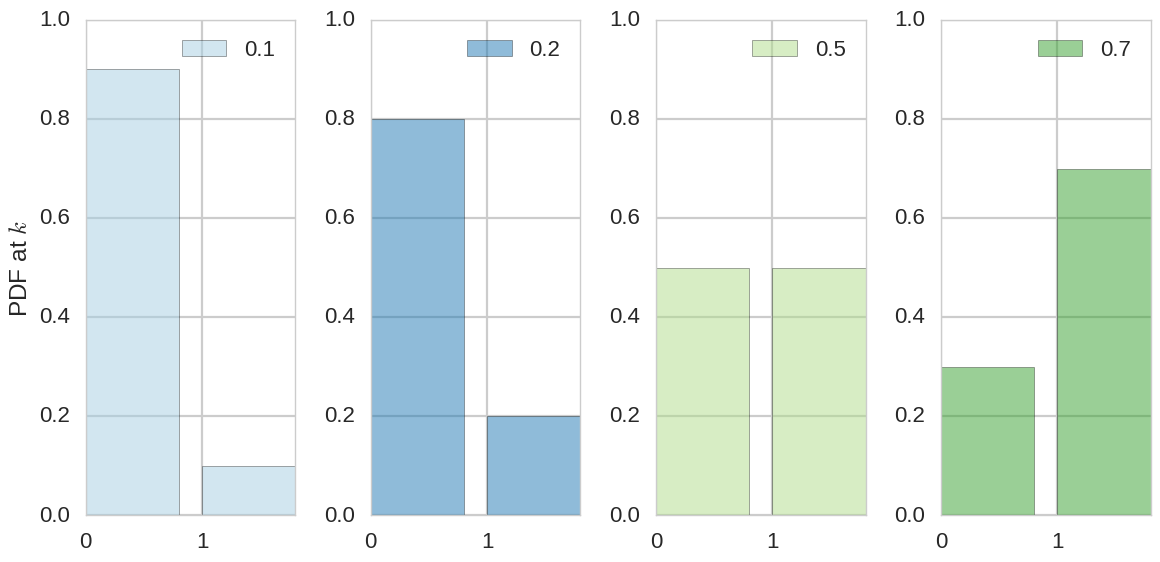

In [4]:
event_space=[0,1]
plt.figure(figsize=(12,6))
colors=sns.color_palette(palette='Paired')
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    # PMF - Probability Mass Function 
    # PDF - Probability Density Function
    plt.bar(event_space, sp.stats.bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    ax.xaxis.set_ticks(event_space)
    plt.ylim((0,1))
    plt.legend(loc='best')
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

## [Биномиальное распределение](https://ru.wikipedia.org/wiki/%D0%91%D0%B8%D0%BD%D0%BE%D0%BC%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

многоразовое подбрасывание монетки, бином Ньютона, треугольник паскаля.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Pascal's_triangle_5.svg/250px-Pascal's_triangle_5.svg.png)

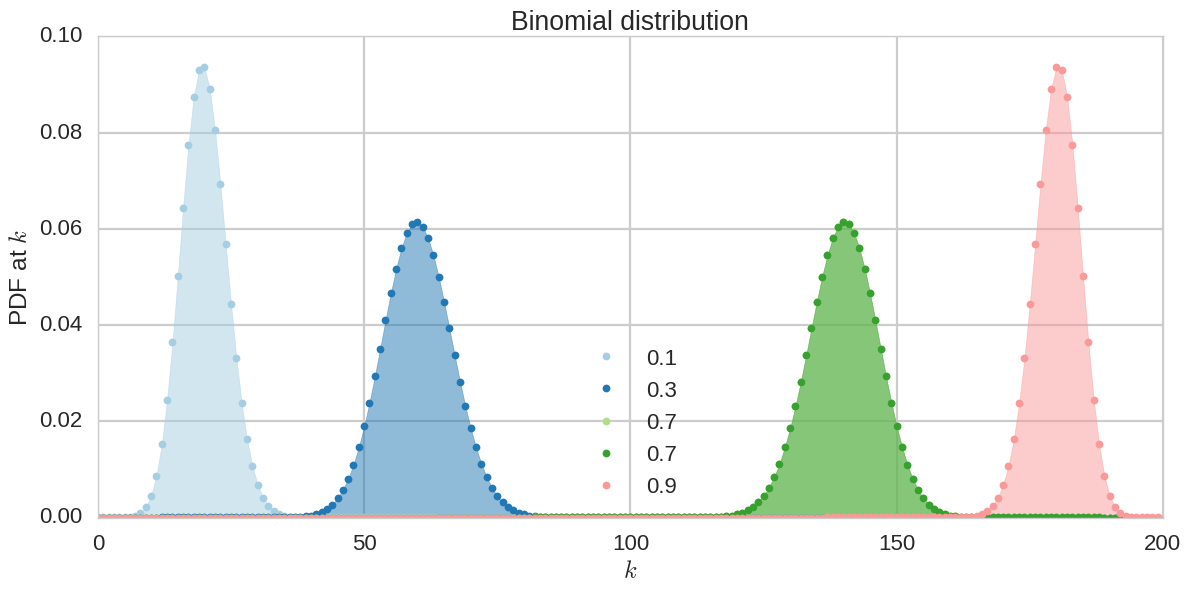

In [5]:
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = sp.stats.binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend(loc='best')
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

(30, 70)

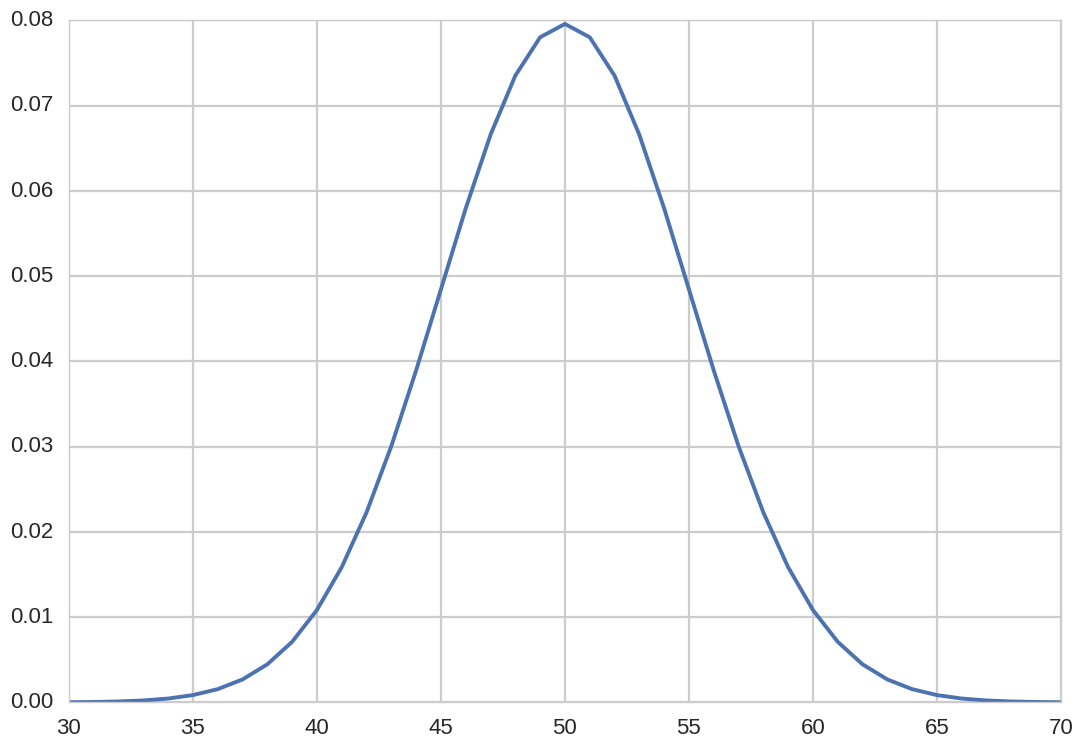

In [6]:
p = 0.5
rv = sp.stats.binom(100, p)
plt.plot(k, rv.pmf(k))
plt.xlim([30,70])

(30, 70)

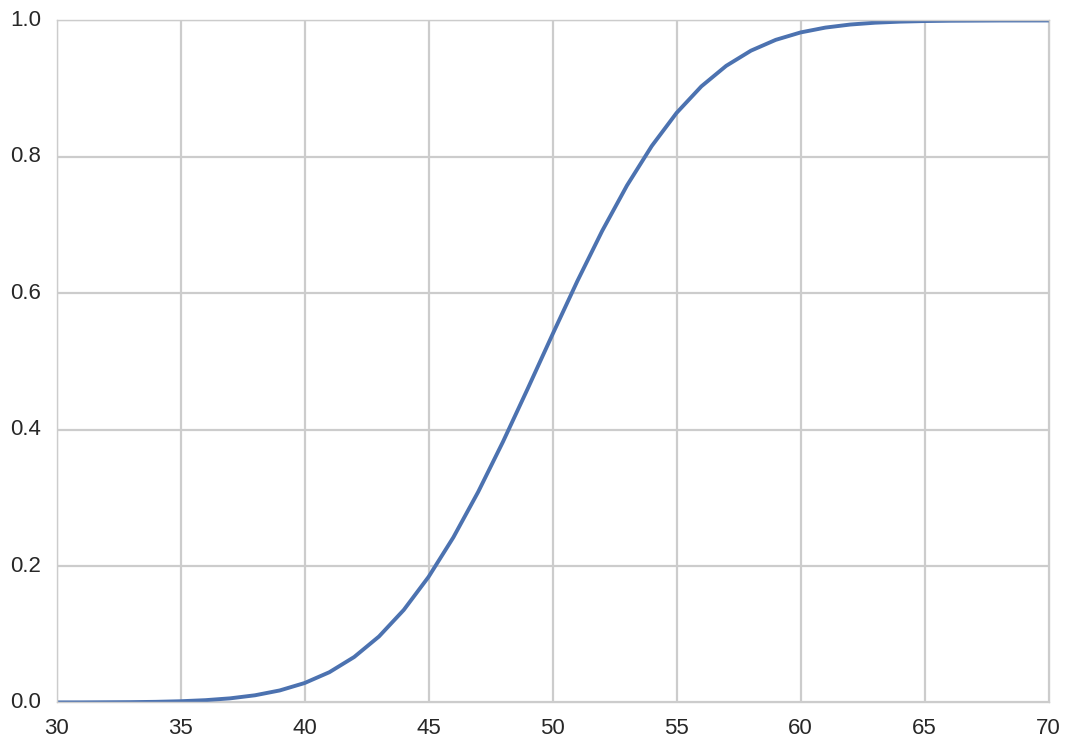

In [7]:
plt.plot(k, rv.cdf(k))
plt.xlim([30,70])

### Разные способы получить случайные числа
1. np.random.choice - Выбор случайного элемента из массива
2. np.random.random - Случайное число из равномерного распределения в границах [0.0,1.0)
3. np.random.randint - Случайное целое число в заданном диапазоне.
4. np.random.randn - Случайное число из заданного нормального распределения.
5. scipy.stats.distrib - Дает нам возможность работать с определенными распределениями. Вместо distrib подставьте нужное распределение (например binom). distrib.pdf, distrib.pm, distrib.cdf дают нам соответствующие характеристики распределения. Используя distrib как функцию мы можем получить генератор случайных величин из заданного распределения, distrib(params).rvs(size).

## [Математическое ожидание](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D0%B6%D0%B8%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5) и [дисперсия](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B)

In [8]:
def throw_a_coin(n):
    brv = sp.stats.bernoulli(0.5)
    return brv.rvs(size=n)

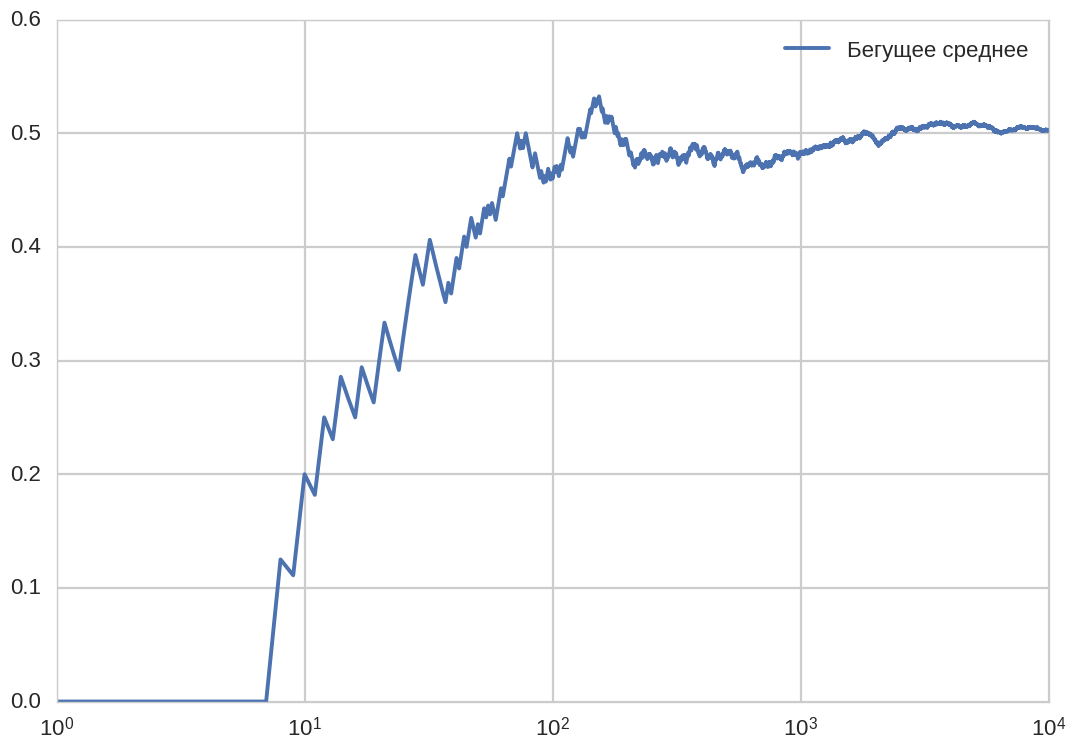

In [9]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])
plt.xscale('log')
plt.plot(sequence_lengths, running_means, label=u'Бегущее среднее');
plt.legend(loc='best')

## [Закон больших чисел](https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D1%87%D0%B8%D1%81%D0%B5%D0%BB)

In [10]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [11]:
make_throws(number_of_samples=5, sample_size=100)

array([ 0.45,  0.44,  0.44,  0.54,  0.5 ])

In [12]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=100, sample_size=i) for i in sample_sizes]

In [13]:
len(sample_means)

1000

In [14]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

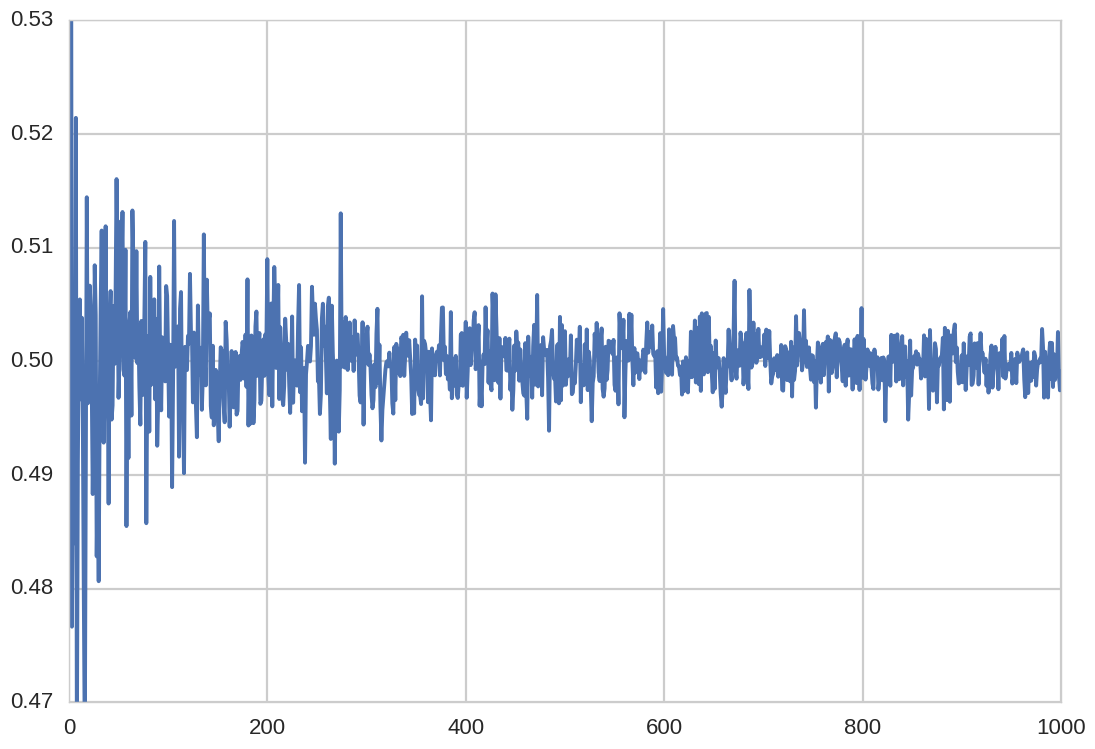

In [15]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.47,0.53]);

## [Выборочное распределение](https://en.wikipedia.org/wiki/Sampling_distribution)

In [16]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

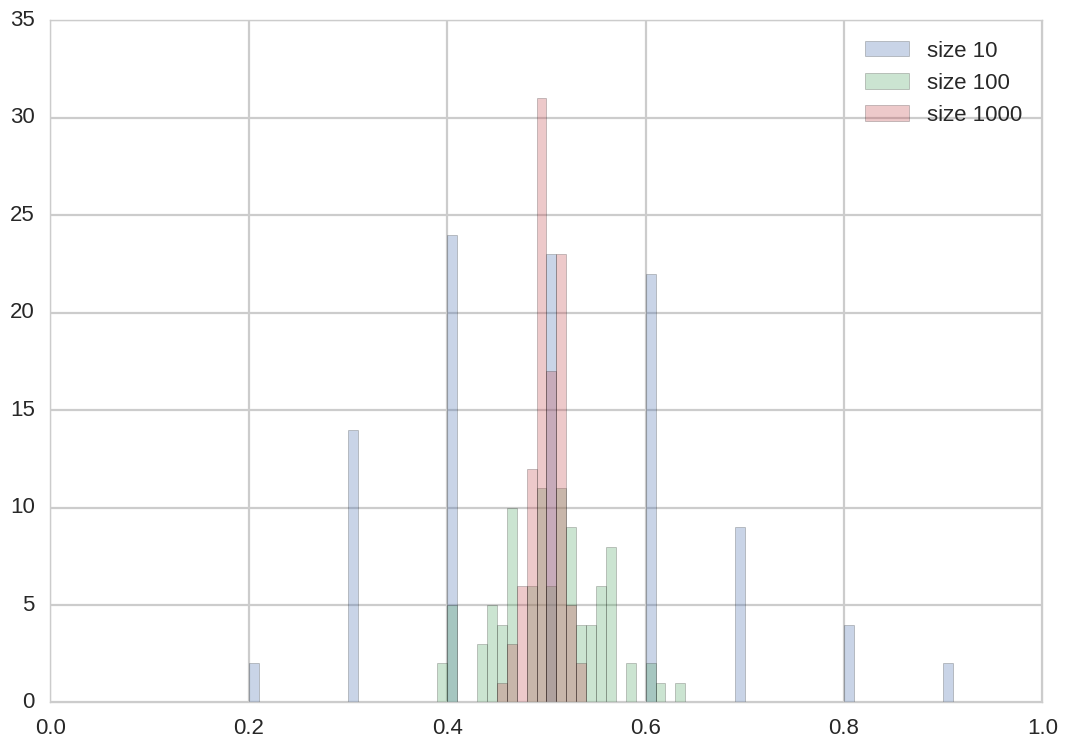

In [17]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.3, label="size 10");
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.3, label="size 100");
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3, label="size 1000");
plt.legend(loc='best')

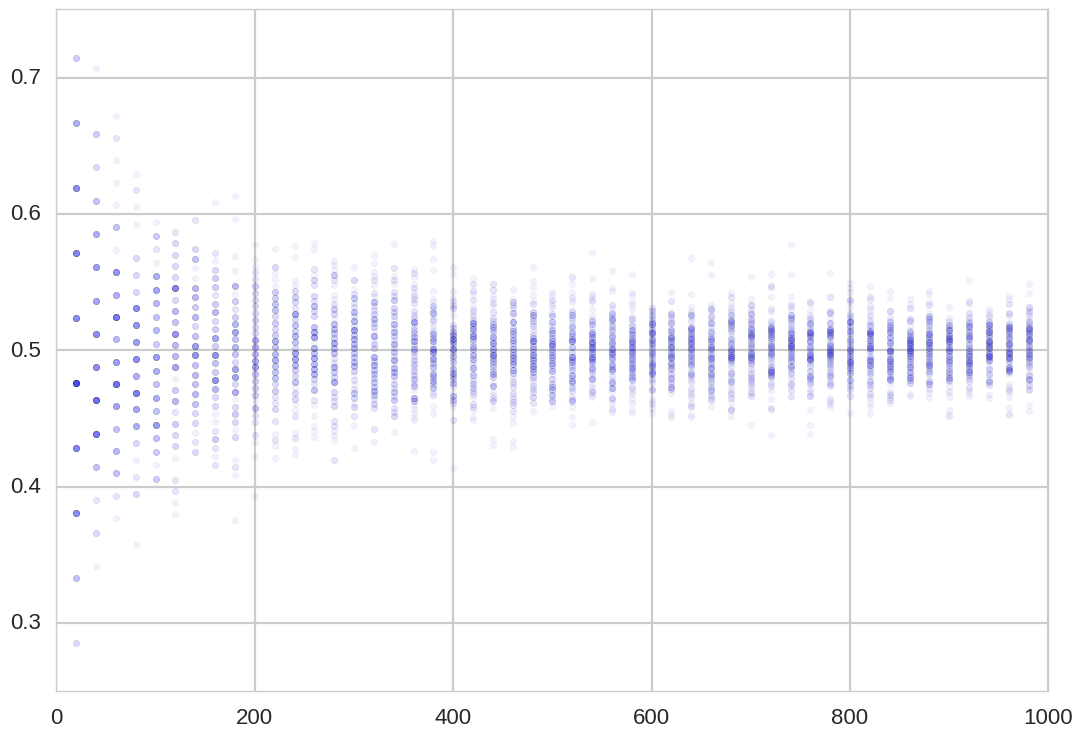

In [18]:
for i in sample_sizes:
    if i % 20 ==0 and i < 1000:
        plt.scatter([i]*100, sample_means[i], alpha=0.05);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

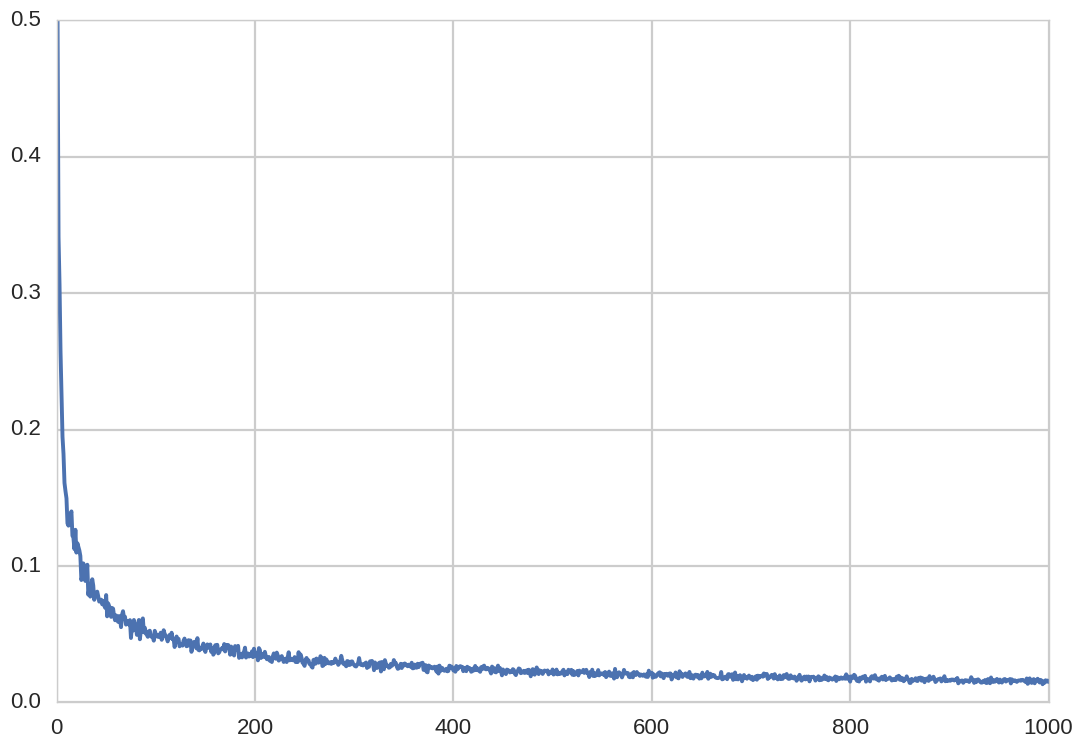

In [19]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means]
plt.plot(sample_sizes, std_of_sample_means_1000);

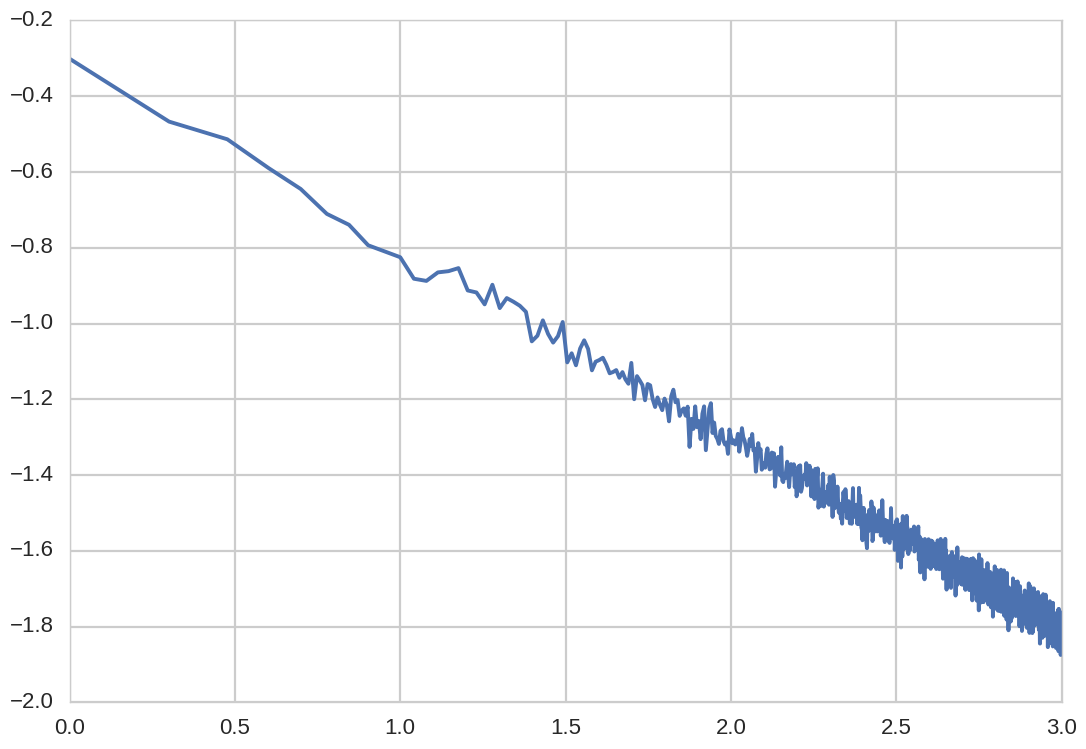

In [20]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

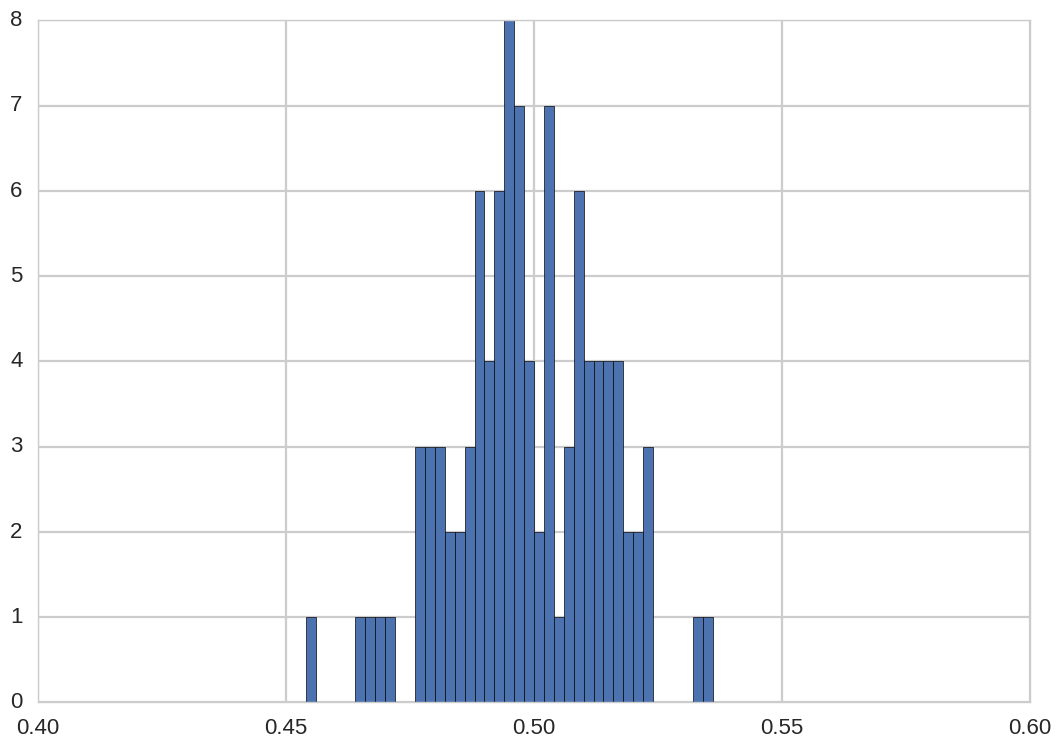

In [21]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));

## [Нормальное распределение](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

68-95-99.7%

Максимальная энтропия

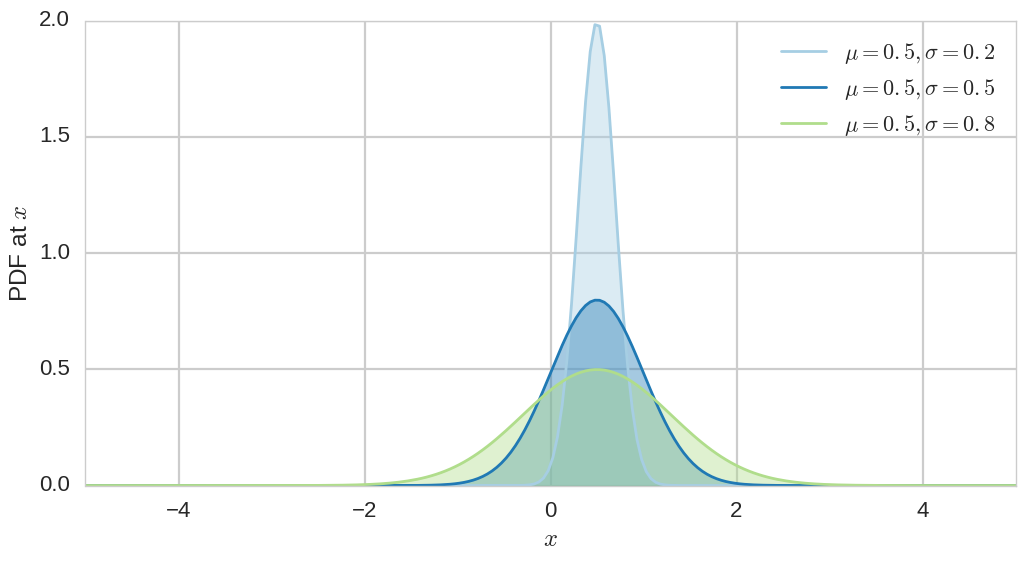

In [22]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)

fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
plt.xlim([-5,5])
plt.legend(loc='best')
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

## [Центральная предельная теорема](https://ru.wikipedia.org/wiki/Центральная_предельная_теорема)

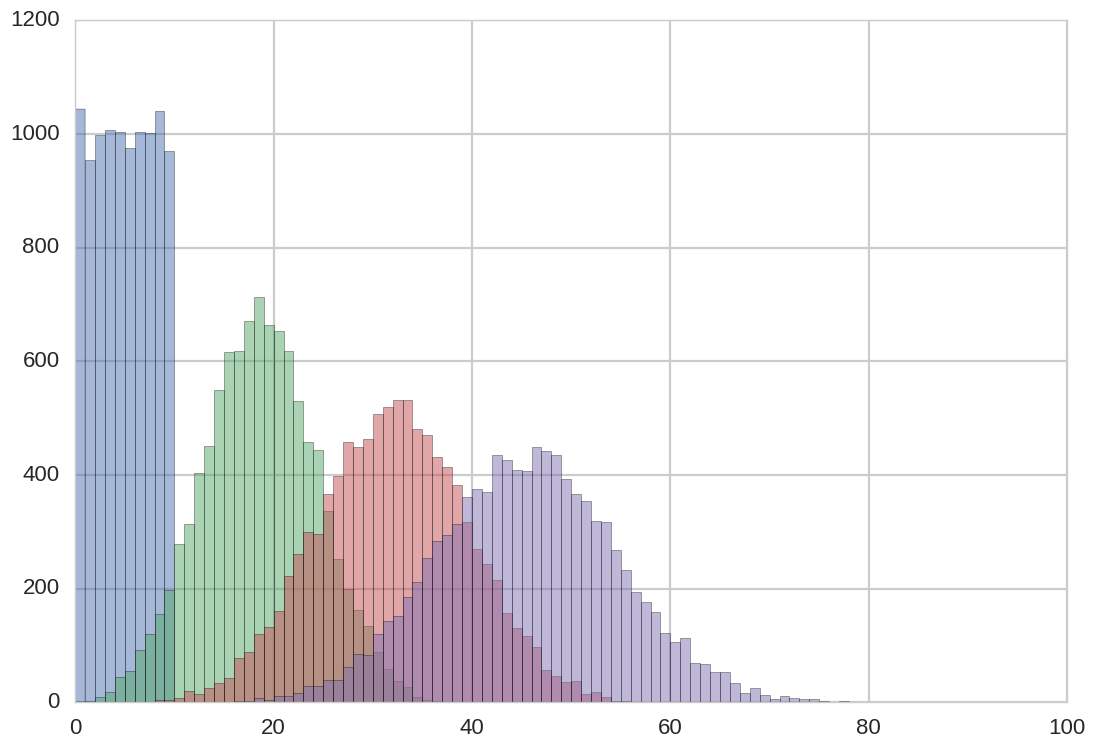

In [85]:
max_int = 10
for sums in range(1, 11, 3):
    a = np.zeros(10000)
    for i in range(sums):
        a += np.random.randint(0, max_int, 10000)
    plt.hist(a, bins=np.arange(0, sums*max_int+1, 1), alpha=0.5)
pass

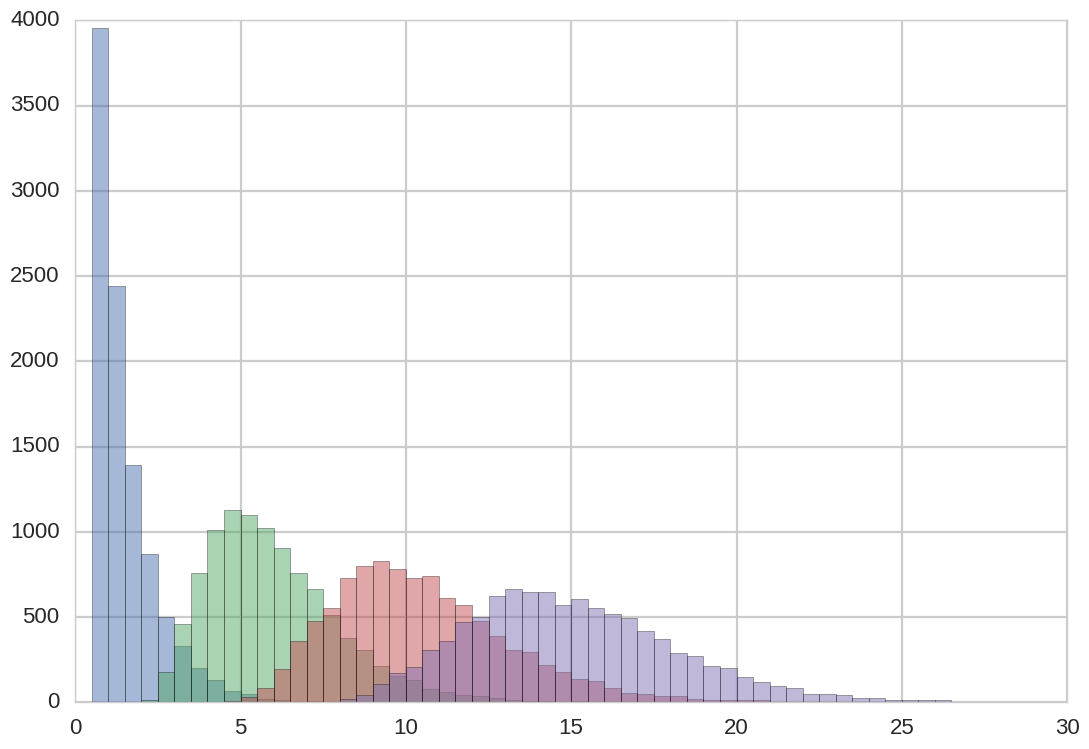

In [84]:
max_int = 10
for sums in range(1, 11, 3):
    a = np.zeros(10000)
    for i in range(sums):
        a += sp.stats.expon(0.5).rvs(10000)
    plt.hist(a, bins=np.arange(0, 30, 0.5), alpha=0.5)

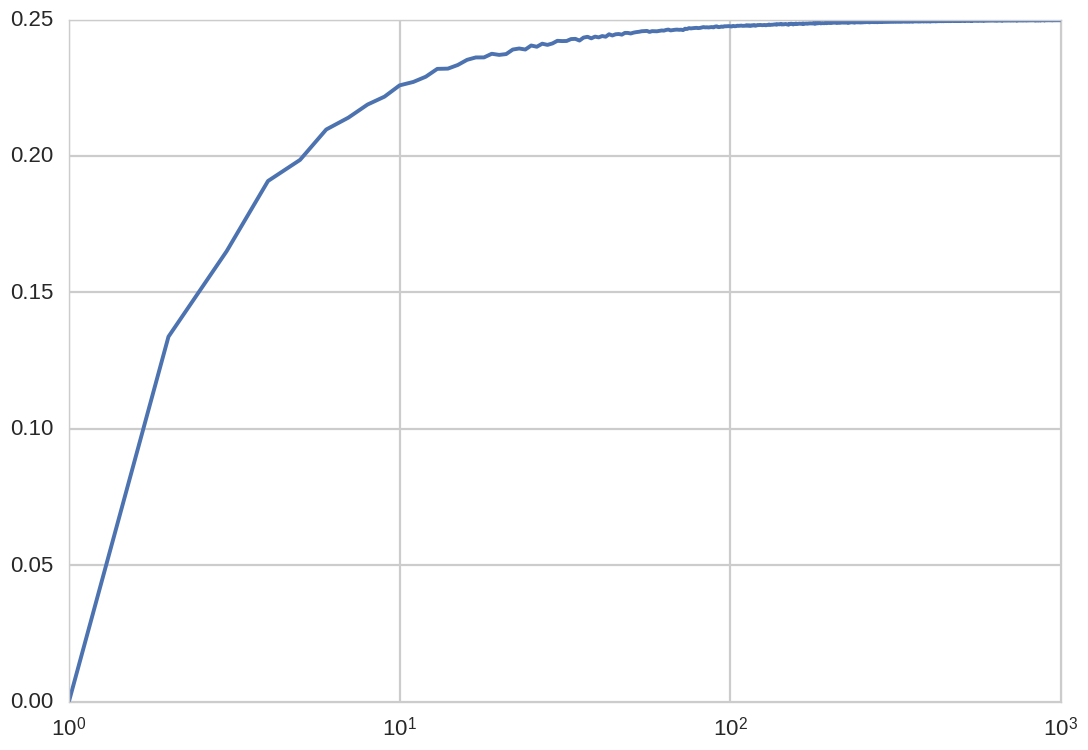

In [23]:
def make_throws_var(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.var(start, axis=1)
sample_vars_1000_replicates = [make_throws_var(number_of_samples=1000, sample_size=i) for i in sample_sizes]
mean_of_sample_vars_1000 = [np.mean(vars) for vars in sample_vars_1000_replicates]
plt.plot(sample_sizes, mean_of_sample_vars_1000)
plt.xscale("log")

## [Экспоненциальное распределение](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5)

Отсутствие памяти.

Вероятность промежутков редких независимых событий.

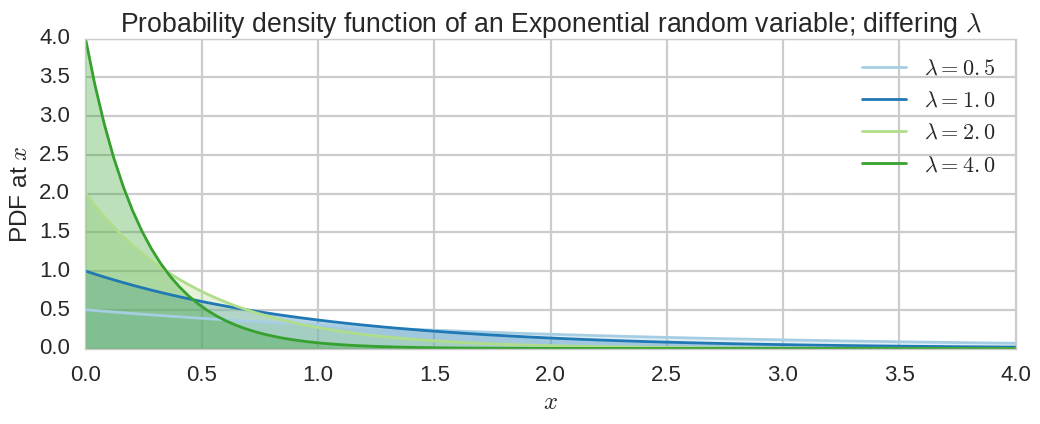

In [24]:
from scipy.stats import expon
x = np.linspace(0,4, 100)

lambda_ = [0.5, 1, 2, 4]
plt.figure(figsize=(12,4))
for l,c in zip(lambda_,colors):
    plt.plot(x, expon.pdf(x, scale=1./l), lw=2, 
                color=c, label = "$\lambda = %.1f$"%l)
    plt.fill_between(x, expon.pdf(x, scale=1./l), color=c, alpha = .33)
    
plt.legend()
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

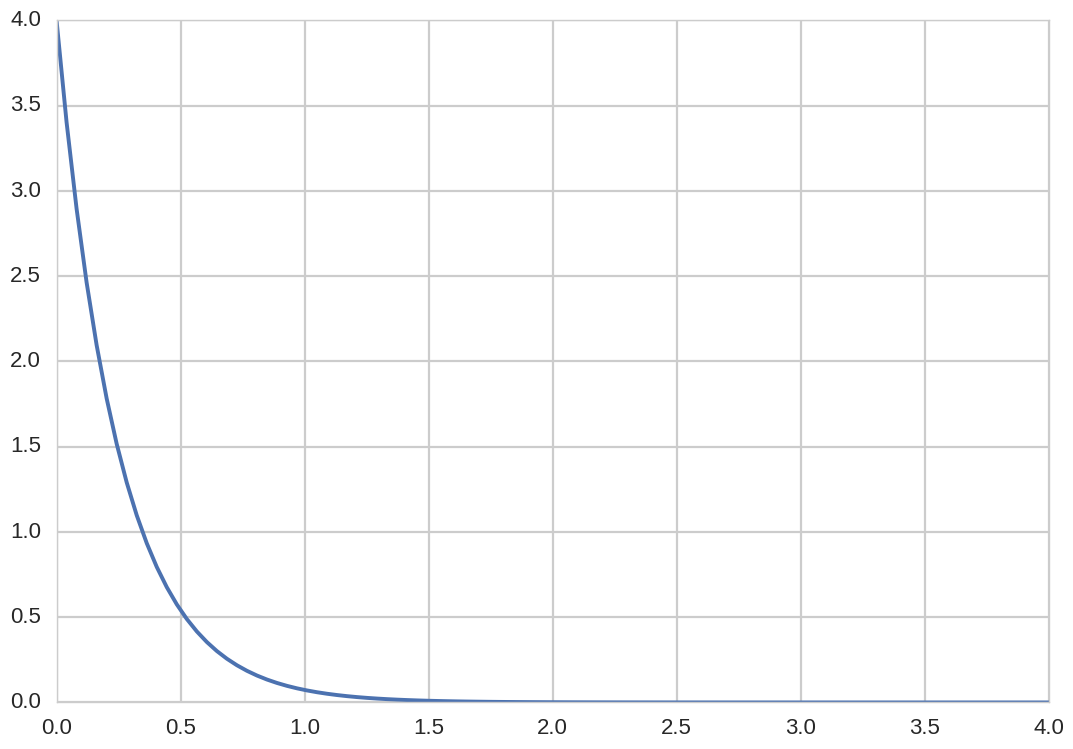

In [25]:
plt.plot(x, expon.pdf(x, scale=1./4))

(0.4, 4)

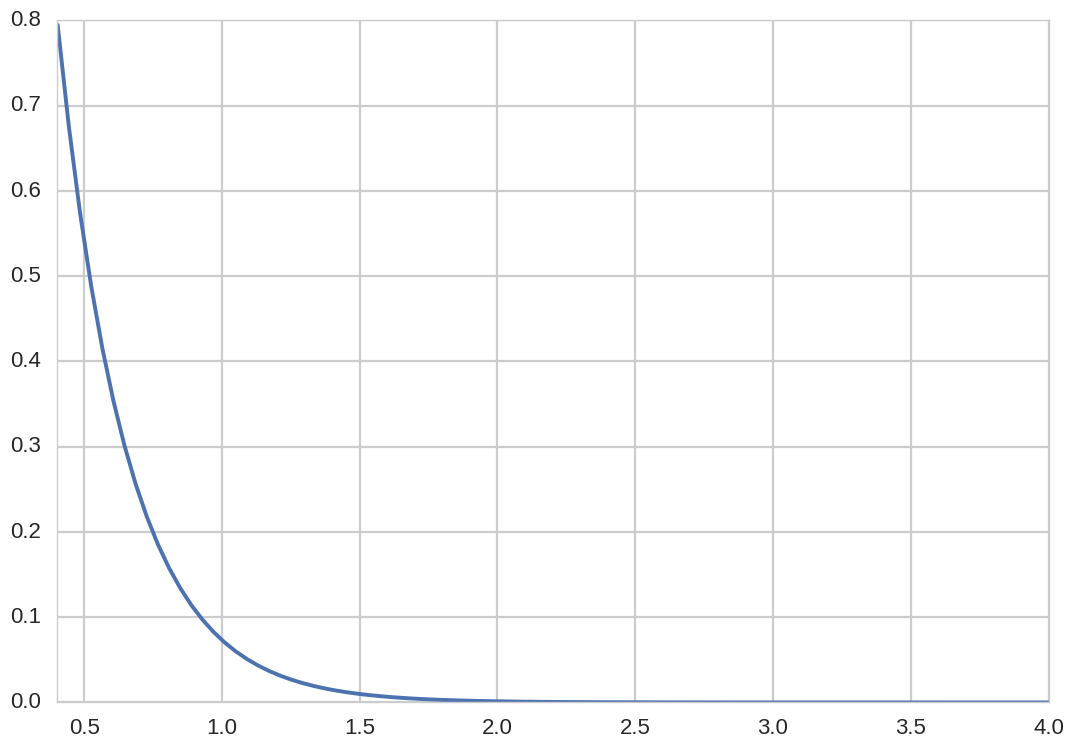

In [26]:
plt.plot(x[10:], expon.pdf(x[10:], scale=1./4))
plt.xlim([0.4, 4])

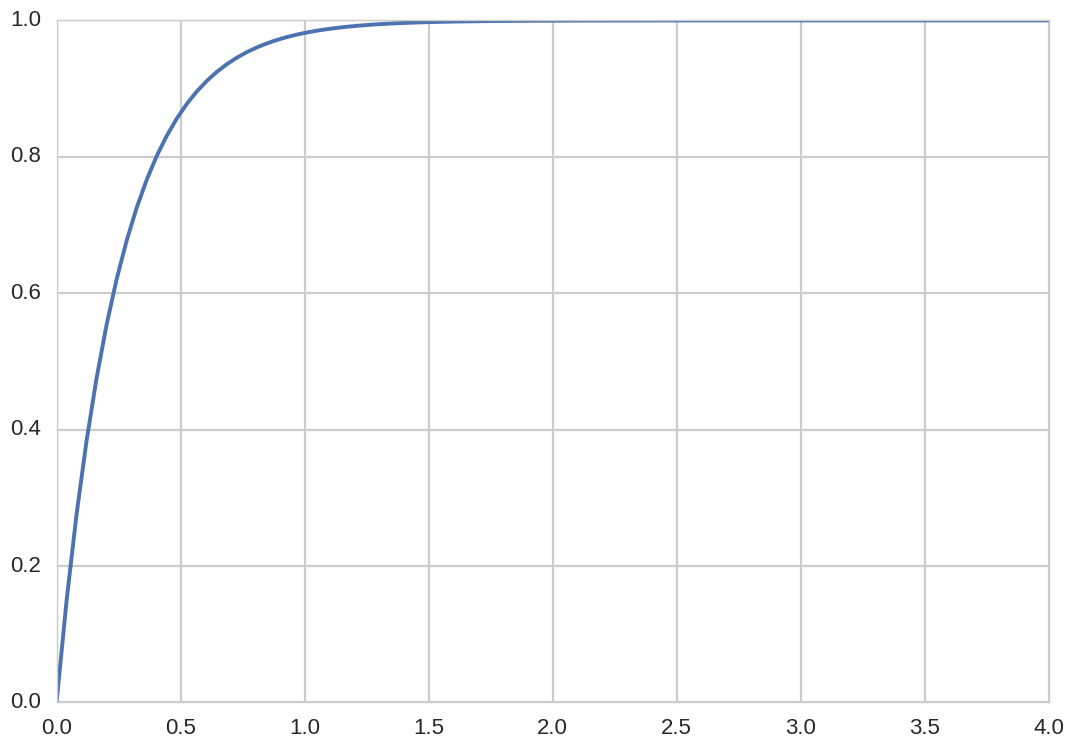

In [27]:
plt.plot(x, expon.cdf(x, scale=1./4))

## [Распределение Вейбулла](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%92%D0%B5%D0%B9%D0%B1%D1%83%D0%BB%D0%BB%D0%B0)

Анализ выживаемости, отношение с экспоненциальным распределением.

Обладает памятью, более гибкое в применении к живым людям.

Не такое знаменитое, но [все же](https://books.google.com.ua/books/about/The_Weibull_Distribution.html?id=6wdcTfiLNS4C&redir_esc=y&hl=en)...

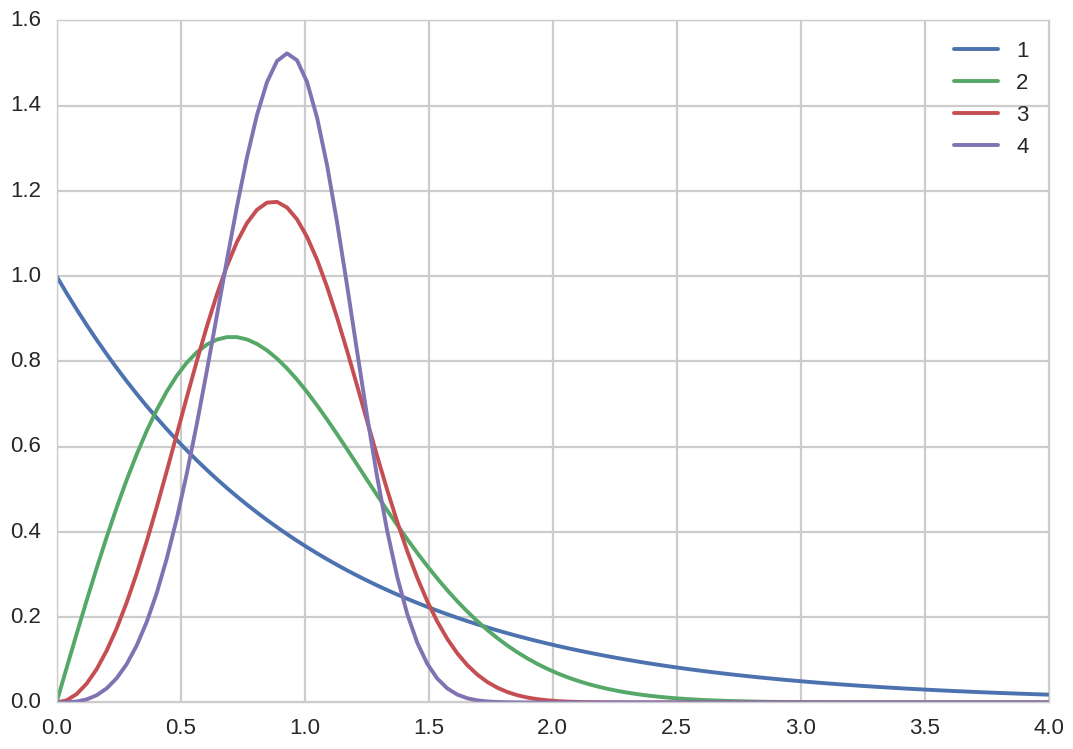

In [28]:
plt.plot(x, sp.stats.weibull_min.pdf(x, 1), label='1')
plt.plot(x, sp.stats.weibull_min.pdf(x, 2), label='2')
plt.plot(x, sp.stats.weibull_min.pdf(x, 3), label='3')
plt.plot(x, sp.stats.weibull_min.pdf(x, 4), label='4')
plt.legend(loc='best')

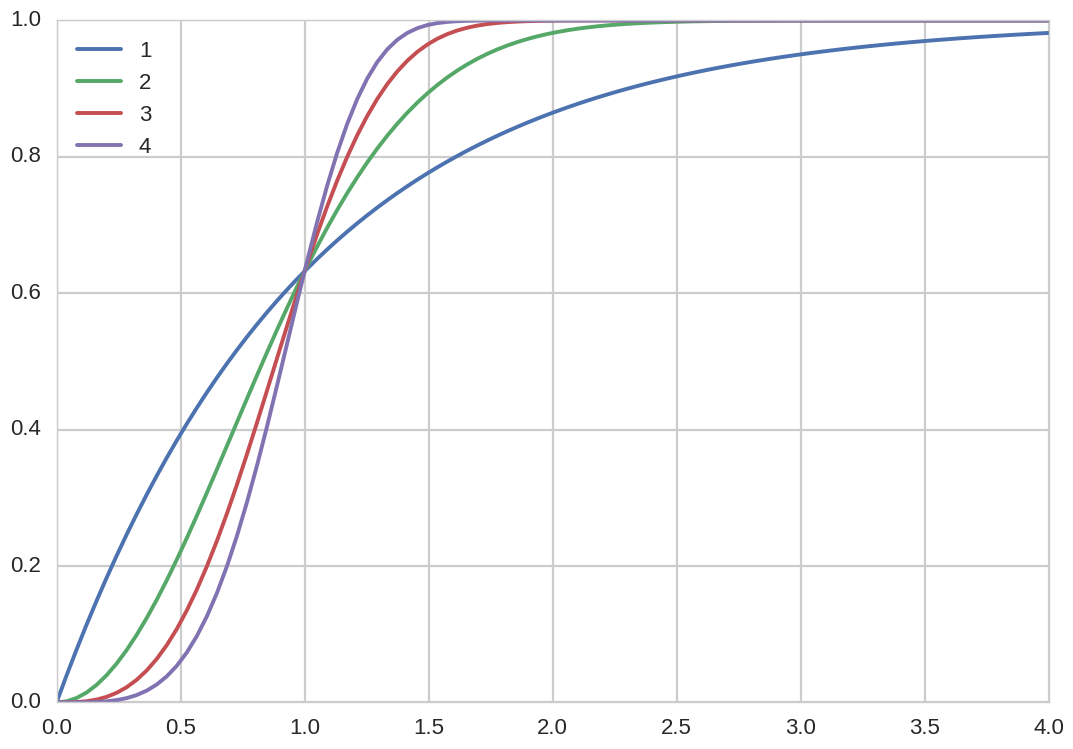

In [29]:
plt.plot(x, sp.stats.weibull_min.cdf(x, 1), label='1')
plt.plot(x, sp.stats.weibull_min.cdf(x, 2), label='2')
plt.plot(x, sp.stats.weibull_min.cdf(x, 3), label='3')
plt.plot(x, sp.stats.weibull_min.cdf(x, 4), label='4')
plt.legend(loc='best')

## [Распределение Пуассона](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9F%D1%83%D0%B0%D1%81%D1%81%D0%BE%D0%BD%D0%B0)

Количество редких событий, произошедших за период времени.

Среднее и дисперсия равны параметру.

Для больших значений параметра приближается к форме нормального распределения.

Пример с количеством детей.

Проблемы - больше 0 чем ожидается, ограничения дисперсии.

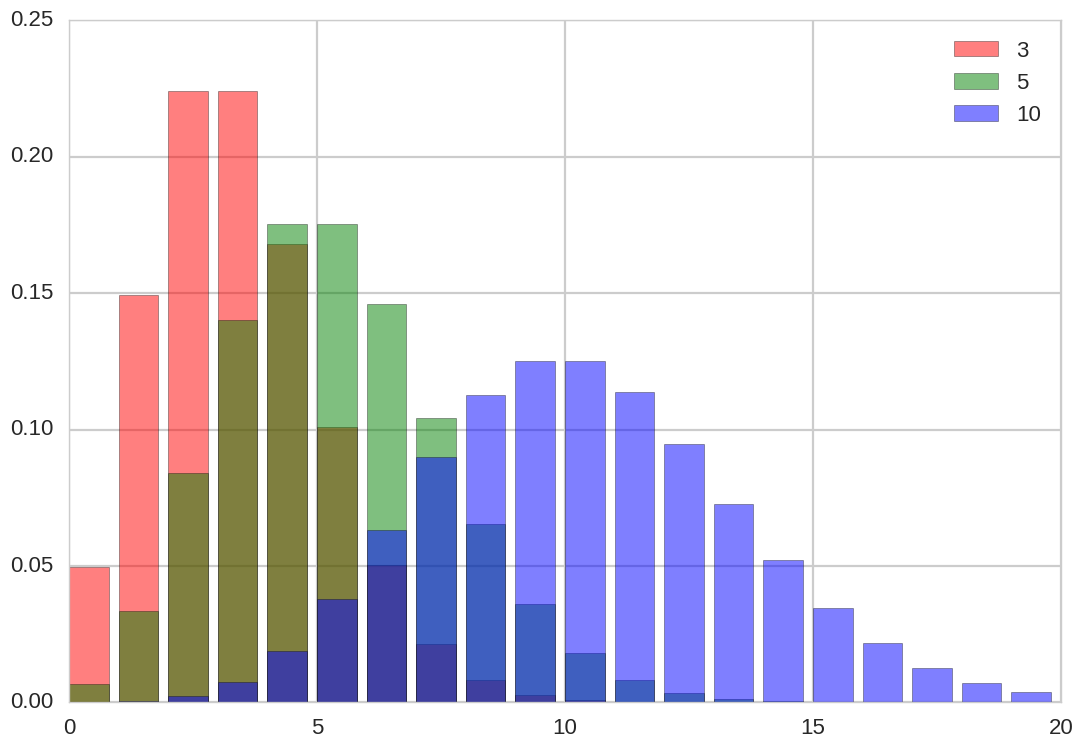

In [30]:
x = np.arange(0, 20, 1)
plt.bar(x, sp.stats.poisson(3).pmf(x), label='3', alpha=0.5, color='red')
plt.bar(x, sp.stats.poisson(5).pmf(x), label='5', alpha=0.5, color='green')
plt.bar(x, sp.stats.poisson(10).pmf(x), label='10', alpha=0.5, color='blue')
plt.legend(loc='best')

<Container object of 20 artists>

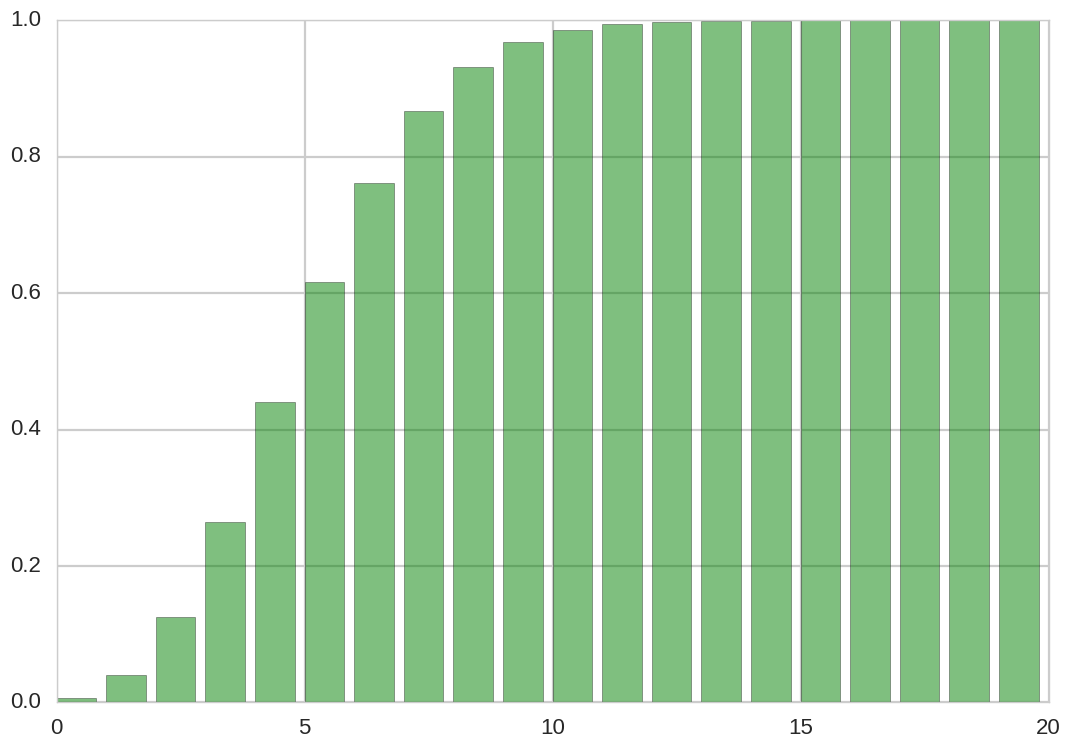

In [31]:
plt.bar(x, sp.stats.poisson(5).cdf(x), label='5', alpha=0.5, color='green')

## Несколько слов о непараметрических распределениях

## [Bootstrap](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B1%D1%83%D1%82%D1%81%D1%82%D1%80%D1%8D%D0%BF)

## Генеративные модели

In [33]:
def throw_a_dice(n, sides=6):
    return np.random.choice(range(1, sides+1), size=n)

throw_a_dice(10)

array([3, 2, 1, 5, 2, 4, 5, 5, 4, 3])

In [36]:
def throw_a_loaded_dice(n, sides=6):
    return np.random.choice(range(1, sides+1)+[sides], size=n)

throw_a_loaded_dice(10)

array([2, 2, 3, 4, 4, 3, 5, 1, 6, 5])

In [37]:
df = pd.DataFrame({'honest':throw_a_dice(1000), 'loaded':throw_a_loaded_dice(1000)})
df.head()

,honest,loaded
0,6,5
1,2,5
2,2,3
3,6,1
4,6,2


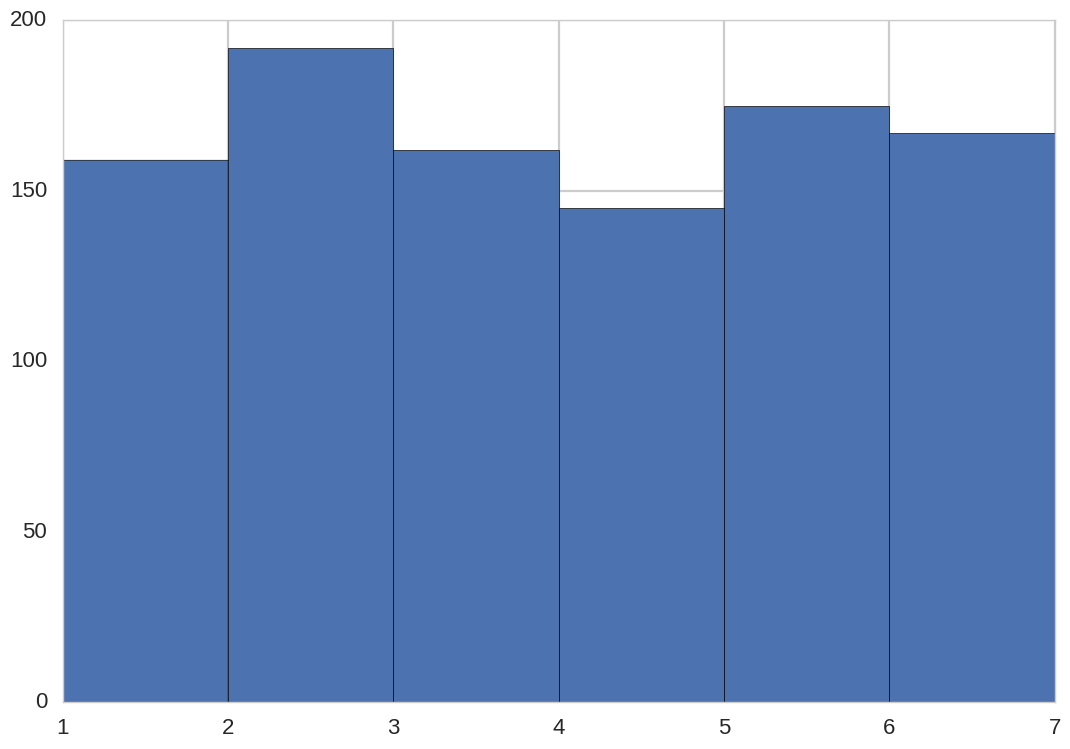

In [99]:
df.honest.hist(bins=[1,2,3,4,5,6,7])

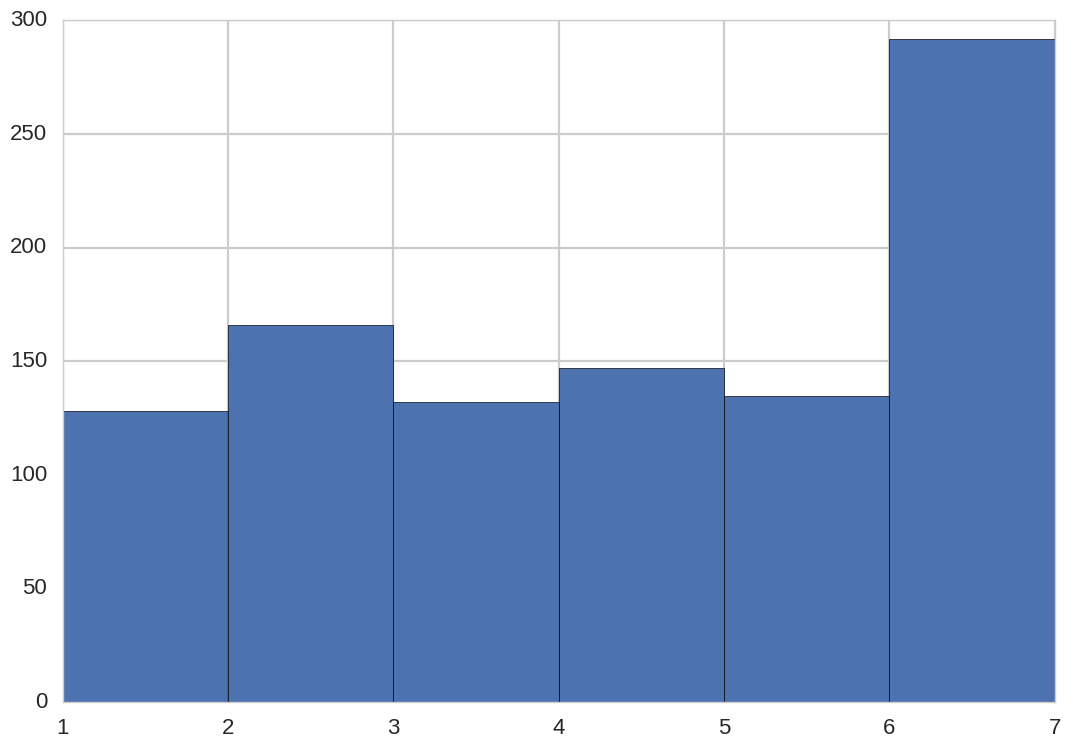

In [100]:
df.loaded.hist(bins=[1,2,3,4,5,6,7])

In [46]:
print sum(df.honest > df.loaded)
print sum(df.honest > df.loaded)/float(df[df.honest != df.loaded].shape[0])
print sum(df.honest == df.loaded)/float(df[df.honest != df.loaded].shape[0]) 
print sum(df.honest < df.loaded)/float(df[df.honest != df.loaded].shape[0])

print sum(df.honest < df.loaded)/float(sum(df.honest > df.loaded))

342
0.41963190184
0.226993865031
0.58036809816
1.38304093567


In [91]:
# For D&D fans!

dice_rolls=10000

df2 = pd.DataFrame({
    '1d12':throw_a_dice(dice_rolls, sides=12),
    '2d6':throw_a_dice(dice_rolls, sides=6)+throw_a_dice(dice_rolls, sides=6),
    '3d4':throw_a_dice(dice_rolls, sides=4)+throw_a_dice(dice_rolls, sides=4)+throw_a_dice(dice_rolls, sides=4)
})

df2.head()

,1d12,2d6,3d4
0,8,7,11
1,6,4,10
2,3,5,5
3,8,10,6
4,6,5,9


In [92]:
df2.describe()

,1d12,2d6,3d4
count,10000.000000,10000.000000,10000.00000
mean,6.517100,6.965600,7.51350
std,3.469368,2.398373,1.93809
min,1.000000,2.000000,3.00000
25%,4.000000,5.000000,6.00000
50%,6.000000,7.000000,8.00000
75%,10.000000,9.000000,9.00000
max,12.000000,12.000000,12.00000


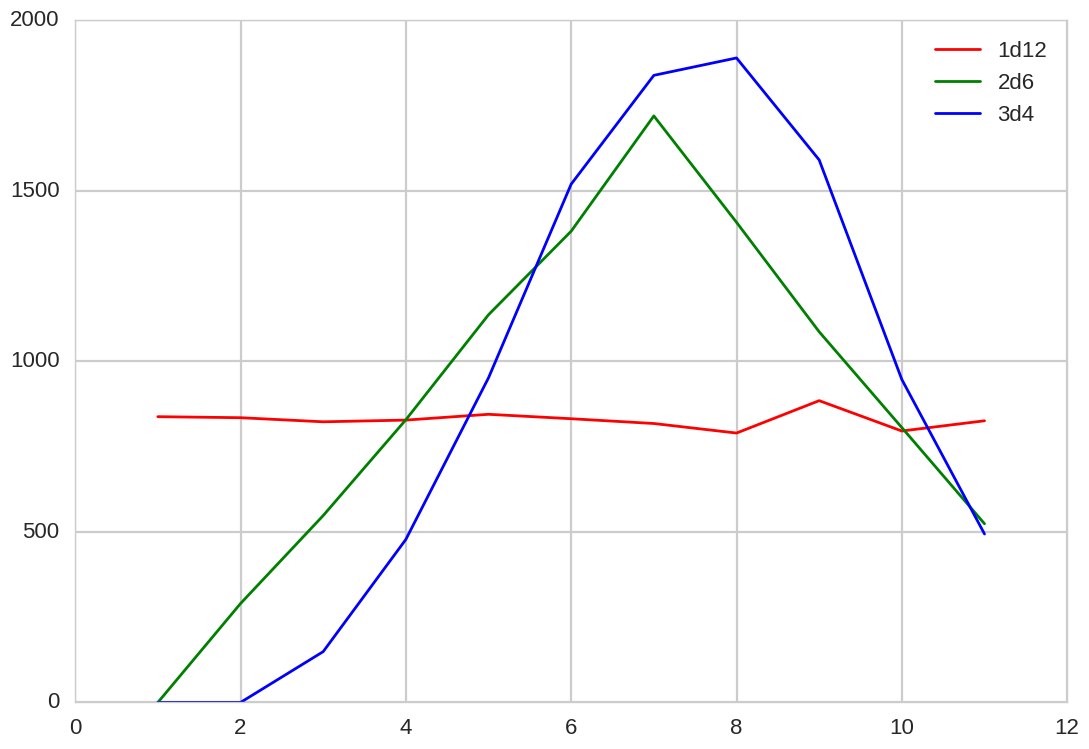

In [93]:
x = np.arange(1, 12, 1)
plt.plot(x, [sum(df2['1d12'] == i) for i in x], label='1d12', lw=2, color='red')
plt.plot(x, [sum(df2['2d6'] == i) for i in x], label='2d6', lw=2, color='green')
plt.plot(x, [sum(df2['3d4'] == i) for i in x], label='3d4', lw=2, color='blue')
plt.legend(loc='best')

In [95]:
print '1d12 better in %d cases ' % sum((df2['1d12']>df2['2d6']) & (df2['1d12']>df2['3d4']))
print '2d6 better in %d cases ' % sum((df2['2d6']>df2['1d12']) & (df2['2d6']>df2['3d4']))
print '3d4 better in %d cases ' % sum((df2['3d4']>df2['2d6']) & (df2['3d4']>df2['1d12']))

1d12 better in 2944 cases 
2d6 better in 2402 cases 
3d4 better in 3176 cases 


## Домашнее задание

1. Посчитайте интервалы между появлениями обновлений в ваших данных, постройте гистограмму и посчитав статистические параметры этой колонки (дисперсию, ожидание...) постройте на том же графике соответствующее ей экспоненциальное распределение.
2. Аналогично - разбейте ваши данные на равные интервалы (сутки, час, ...), постройте гистограмму количества обновлений в этот интервал и попытайтесь построить на том же графике распределение Пуассона. 
3. Подумайте над тем, какие еще статистические модели применимы к вашим данным. Если в 1 и 2 графики плохо соответствуют гистограмме - подумайте почему и какие модели могут подойти лучше.

In [133]:
df_cards = pd.read_csv('../homeworks/tempostorm_date.csv', parse_dates=['createdDate'])
df_cards.head()

,Unnamed: 0,date,createdDate,name,playerClass,index
0,0,2014-12-11 20:01:17.997,2014-12-11 20:01:17.997,Windfury Shaman by Reynad,Shaman,0
1,1,2014-12-11 20:13:16.995,2014-12-11 20:13:16.995,BMA's Chowlock Deck,Warlock,1
2,2,2014-12-12 03:56:04.037,2014-12-12 03:56:04.037,[GvG] Mecha Zoo By Gaara,Warlock,2
3,3,2014-12-12 22:57:19.684,2014-12-12 22:57:19.684,Tempo Mage,Mage,3
4,4,2014-12-12 23:50:56.608,2014-12-12 23:50:56.608,Kitkatz's Control Warrior,Warrior,4


In [156]:
intervals = pd.to_numeric(df_cards['createdDate'].diff()[1:]).apply(lambda x:x/float(3600 * 10**9)).values

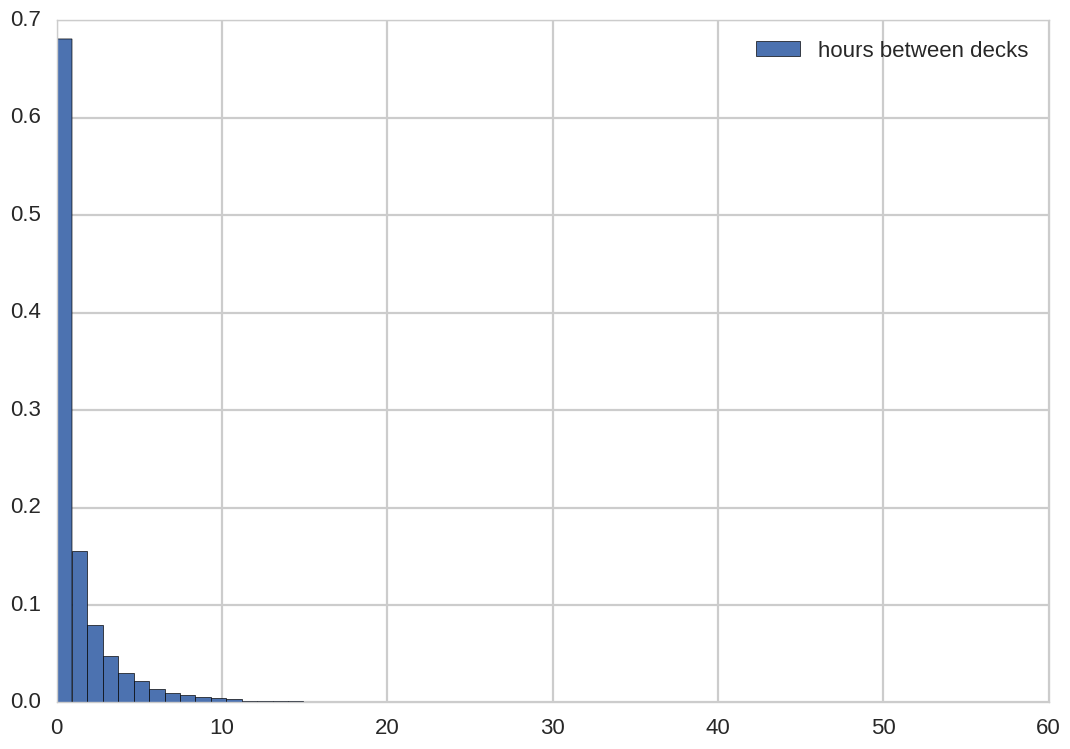

In [189]:
plt.hist(intervals, bins=60, label="hours between decks", normed=True)
plt.legend(loc='best')

In [162]:
print np.mean(intervals)
print np.std(intervals)

1.3876025715
2.42989757399


In [182]:
lambda_from_mean = 1. / np.mean(intervals)
lambda_from_mean

0.72066744508534342

(0, 10)

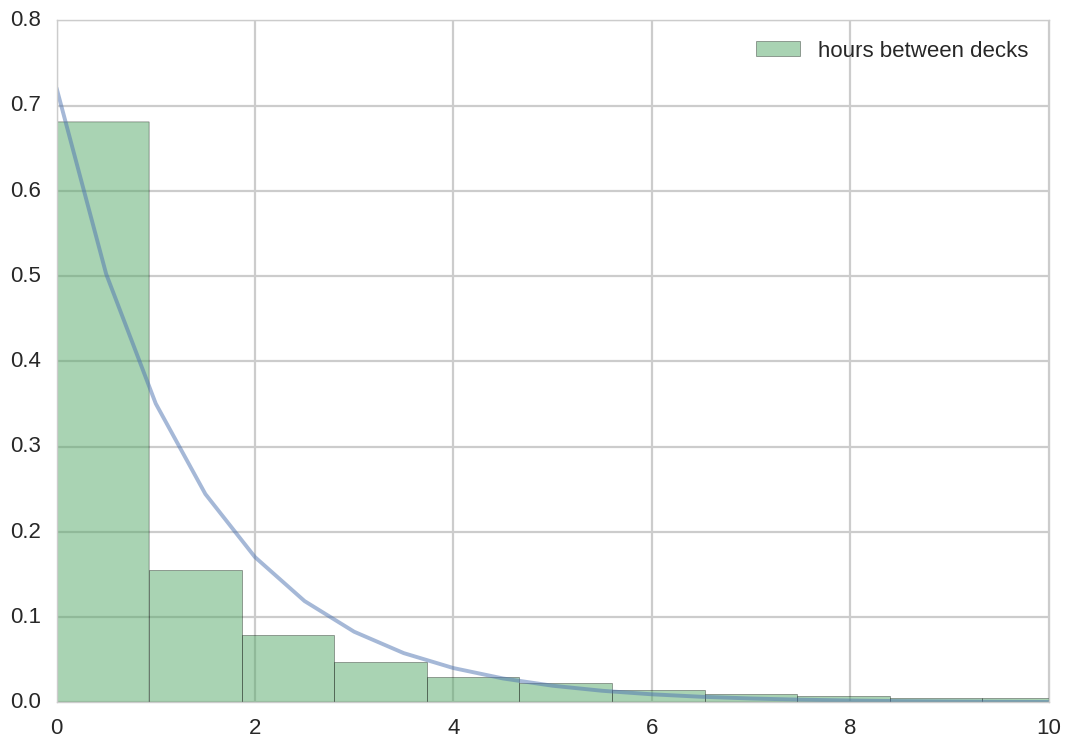

In [195]:
hours = np.arange(0, 60, 0.5)
rv = sp.stats.expon(scale=1./lambda_from_mean)
plt.plot(hours,rv.pdf(hours), alpha=0.5)
plt.hist(intervals, bins=60, label="hours between decks", normed=True, alpha=0.5)
plt.legend(loc='best')
plt.xlim([0, 10])